# DAgger: Ant-v4 Experiment Analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os

os.chdir('/home/mohsen/projects/cs285/hw1/')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [4]:
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = '150'

In [5]:
exp_path = 'tune_exps/'

In [6]:
cat_hyper_params = ['batch_size', 'n_layers', 'size', 
                    'train_batch_size', 'num_agent_train_steps_per_iter', 'n_iter']
cont_hyper_params = ['learning_rate']

## Ant v4 Experiment Hyper-parameter optimization analysis

In [7]:
experiments = [folder for folder in os.listdir(exp_path) if folder.startswith('q2_tune_ant')]

In [8]:
len(experiments)

1785

In [9]:
import json

In [10]:
from tqdm import tqdm

In [11]:
df = None
for experiment in tqdm(sorted(experiments)):
    try:
        progress_df = pd.read_csv(os.path.join(exp_path, experiment, 'progress.csv'))
        if len(progress_df) >= 1:
            # print(experiment)
            progress_df['id'] = experiment
            
            params = json.load(open(os.path.join(exp_path, experiment, 'hyper-params.json'), 'r'))
            if params['eval_batch_size'] != 10000 or params['ep_len'] != 1024: 
                continue
            
            for key, value in params.items():
                if key not in ['agent_params', 'env_kwargs']:
                    progress_df[key] = value
                else:
                    for key2, value2 in params[key].items():
                        progress_df[key2] = value2
            
            if df is None:
                df = progress_df.iloc[-1, :].copy()
            else:
                df = pd.concat([df, progress_df.iloc[-1, :]], axis=1)
        else:
            continue
    except:
        print(experiment)
        continue
df = df.T

  9%|██████████                                                                                                   | 164/1785 [00:00<00:01, 816.34it/s]

q2_tune_ant_Ant-v4_12-09-2022_18-34-21


 23%|█████████████████████████▏                                                                                   | 412/1785 [00:00<00:01, 821.23it/s]

q2_tune_ant_Ant-v4_12-09-2022_23-02-32


 42%|█████████████████████████████████████████████▍                                                               | 745/1785 [00:00<00:01, 826.04it/s]

q2_tune_ant_Ant-v4_13-09-2022_18-56-56


 60%|█████████████████████████████████████████████████████████████████▎                                          | 1079/1785 [00:01<00:00, 785.93it/s]

q2_tune_ant_Ant-v4_14-09-2022_05-32-59
q2_tune_ant_Ant-v4_14-09-2022_18-50-20


 78%|███████████████████████████████████████████████████████████████████████████████████▊                        | 1385/1785 [00:01<00:00, 629.67it/s]

q2_tune_ant_Ant-v4_14-09-2022_23-17-09


 85%|███████████████████████████████████████████████████████████████████████████████████████████▍                | 1512/1785 [00:02<00:00, 595.86it/s]

q2_tune_ant_Ant-v4_15-09-2022_18-26-27


 91%|██████████████████████████████████████████████████████████████████████████████████████████████████▏         | 1622/1785 [00:02<00:00, 318.47it/s]

q2_tune_ant_Ant-v4_15-09-2022_22-08-58
q2_tune_ant_Ant-v4_16-09-2022_01-23-58
q2_tune_ant_Ant-v4_16-09-2022_01-35-48
q2_tune_ant_Ant-v4_16-09-2022_01-38-12


 93%|████████████████████████████████████████████████████████████████████████████████████████████████████▌       | 1662/1785 [00:02<00:00, 279.86it/s]

q2_tune_ant_Ant-v4_16-09-2022_04-11-56


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1785/1785 [00:03<00:00, 505.57it/s]


q2_tune_ant_Ant-v4_16-09-2022_18-15-32
q2_tune_ant_Ant-v4_16-09-2022_18-16-17


In [12]:
df.head()

,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,Train_AverageEpLen,...,render_mode,use_contact_forces,Eval_Accuracy,Iteration,Expert_AverageReturn,Expert_StdReturn,Expert_MaxReturn,Expert_MinReturn,Expert_AverageEpLen,Agent_Accuracy
4,3770.2676,1322.3223,4456.197,679.1389,868.333333,3924.063,0.0,3924.063,3924.063,1000.0,...,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-704.72253,1038.6971,-34.045544,-3102.851,244.097561,-216.34215,110.16792,-106.174225,-326.51007,76.5,...,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,4683.3525,122.3153,4890.3228,4467.104,1000.0,4559.5244,0.0,4559.5244,4559.5244,1000.0,...,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,4367.4834,112.5375,4597.7812,4173.123,1000.0,4201.5894,158.54153,4424.6973,4070.793,974.0,...,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-349.90866,502.75113,-12.971632,-1452.838,297.029412,-413.57077,603.10986,-16.4594,-1567.5117,296.071429,...,None,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.shape

(244, 50)

In [14]:
df['Training Loss'].describe()

count     244.000000
unique    244.000000
top        -1.261646
freq        1.000000
Name: Training Loss, dtype: float64

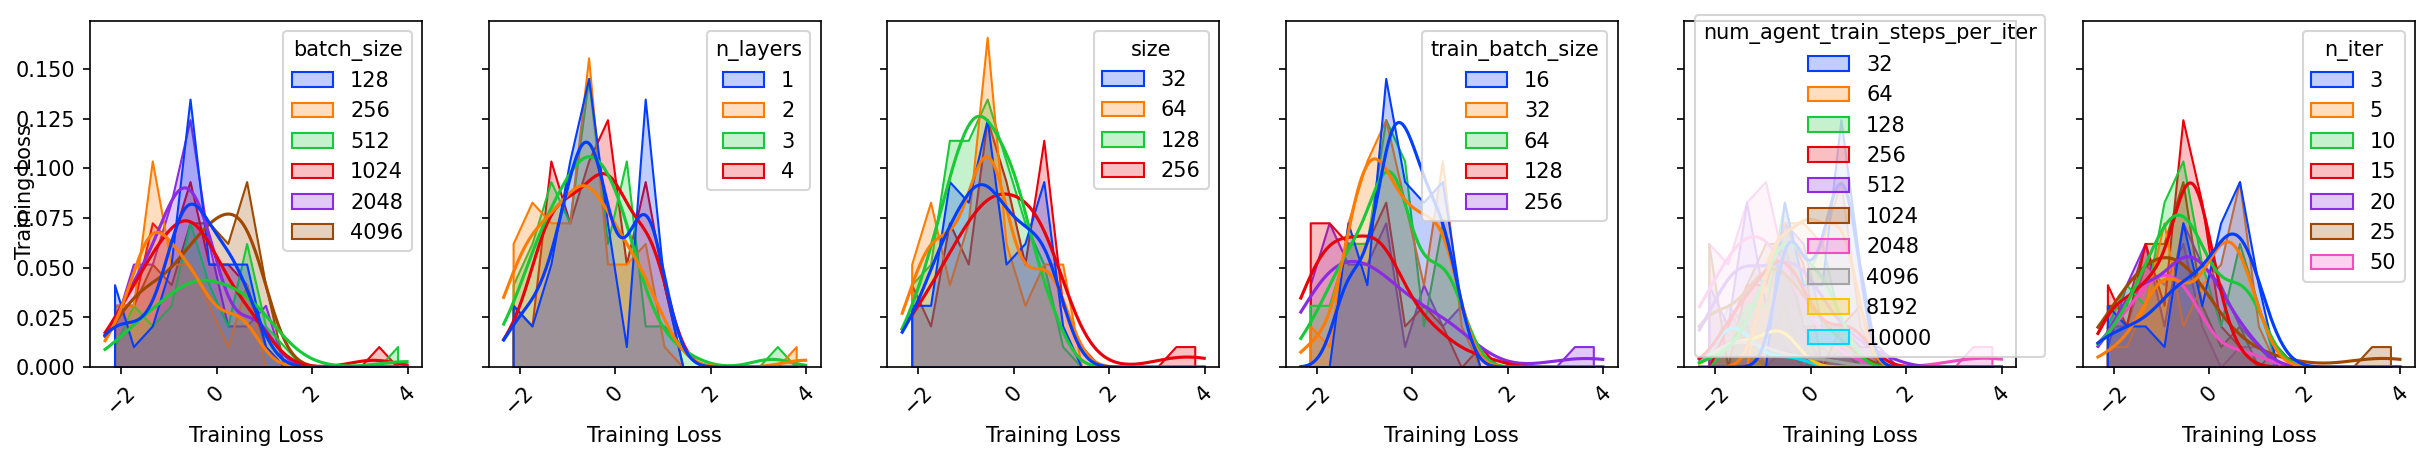

In [15]:
fig, ax = plt.subplots(1, len(cat_hyper_params), sharey=True, sharex=False, figsize=(20, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')
fig.text(0.1, 0.5, 'Training Loss', va='center', rotation='vertical')
for i, param in enumerate(cat_hyper_params):
    g = sns.histplot(data=df, x='Training Loss', hue=param, ax=ax[i], fill=True,
                     palette=sns.color_palette('bright', len(df[param].unique())), kde=True, 
                     element='poly', stat='density')
    g.set_ylabel('')
    ax[i].tick_params(axis='x', rotation=45)

/tmp/ipykernel_3607119/3559714755.py:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.histplot(data=df, x=param, y='Training Loss', kde=True,


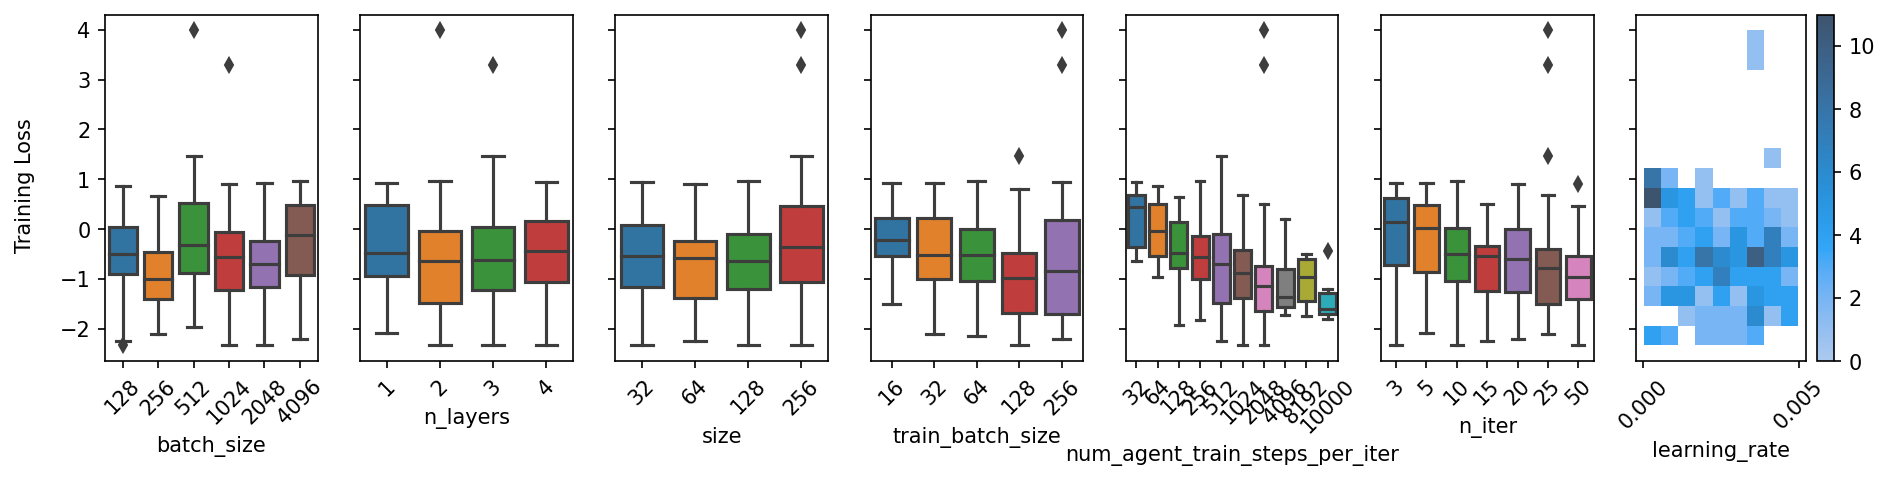

In [16]:
fig, ax = plt.subplots(1, len(cat_hyper_params) + len(cont_hyper_params), sharey=True, sharex=False, figsize=(15, 3))
# fig.text(0.5, 0.04, 'common X', ha='center')

fig.text(0.085, 0.5, 'Training Loss', va='center', rotation='vertical')
for i, param in enumerate(cat_hyper_params):
    g = sns.boxplot(data=df, x=param, y='Training Loss', ax=ax[i])
    g.set_ylabel('')
    ax[i].tick_params(axis='x', rotation=45)

offset = len(cat_hyper_params)

for i, param in enumerate(cont_hyper_params):
    # g = sns.scatterplot(data=df, x=param, y='Training Loss', ax=ax[i + offset])
    # g.set_ylabel('')
    g = sns.histplot(data=df, x=param, y='Training Loss', kde=True,
            palette=sns.color_palette("coolwarm", as_cmap=True), cbar=True,
            ax=ax[i + offset])
    ax[i + offset].tick_params(axis='x', rotation=45)

/tmp/ipykernel_3607119/2945391405.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='learning_rate', y='Training Loss', kind="kde",
/home/mohsen/miniconda3/envs/cs285/lib/python3.9/site-packages/seaborn/distributions.py:1191: UserWarning: The following kwargs were not used by contour: 'binwidth'
  cset = contour_func(


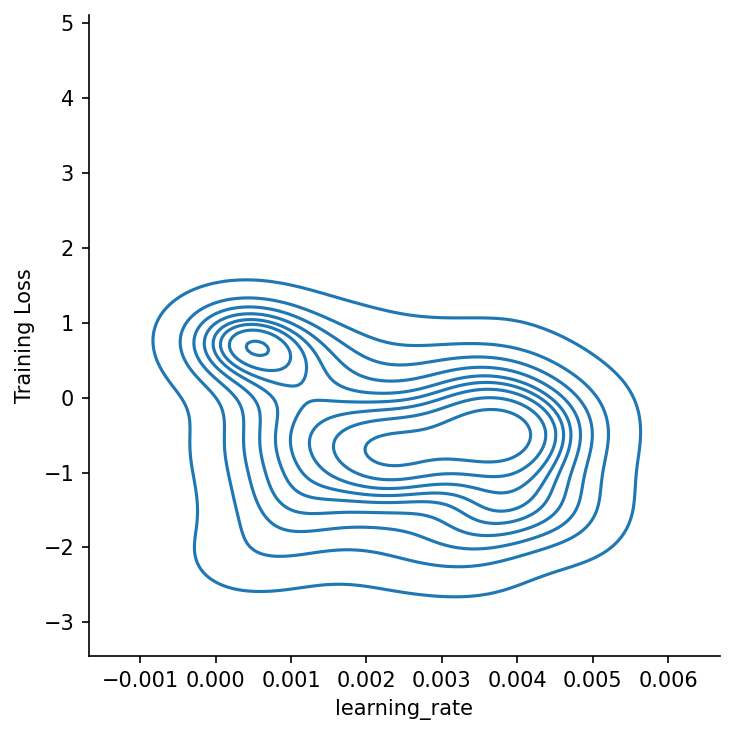

In [17]:
sns.displot(data=df, x='learning_rate', y='Training Loss', kind="kde",
            palette=sns.color_palette("coolwarm", as_cmap=True), 
            binwidth=(0.1, .1e-5), cbar=False)

In [18]:
df[df['Training Loss'] == df['Training Loss'].min()]['id']

2    q2_tune_ant_Ant-v4_15-09-2022_20-56-58
Name: id, dtype: object

In [19]:
plot_df = df[cat_hyper_params]
target_df = df['Training Loss']

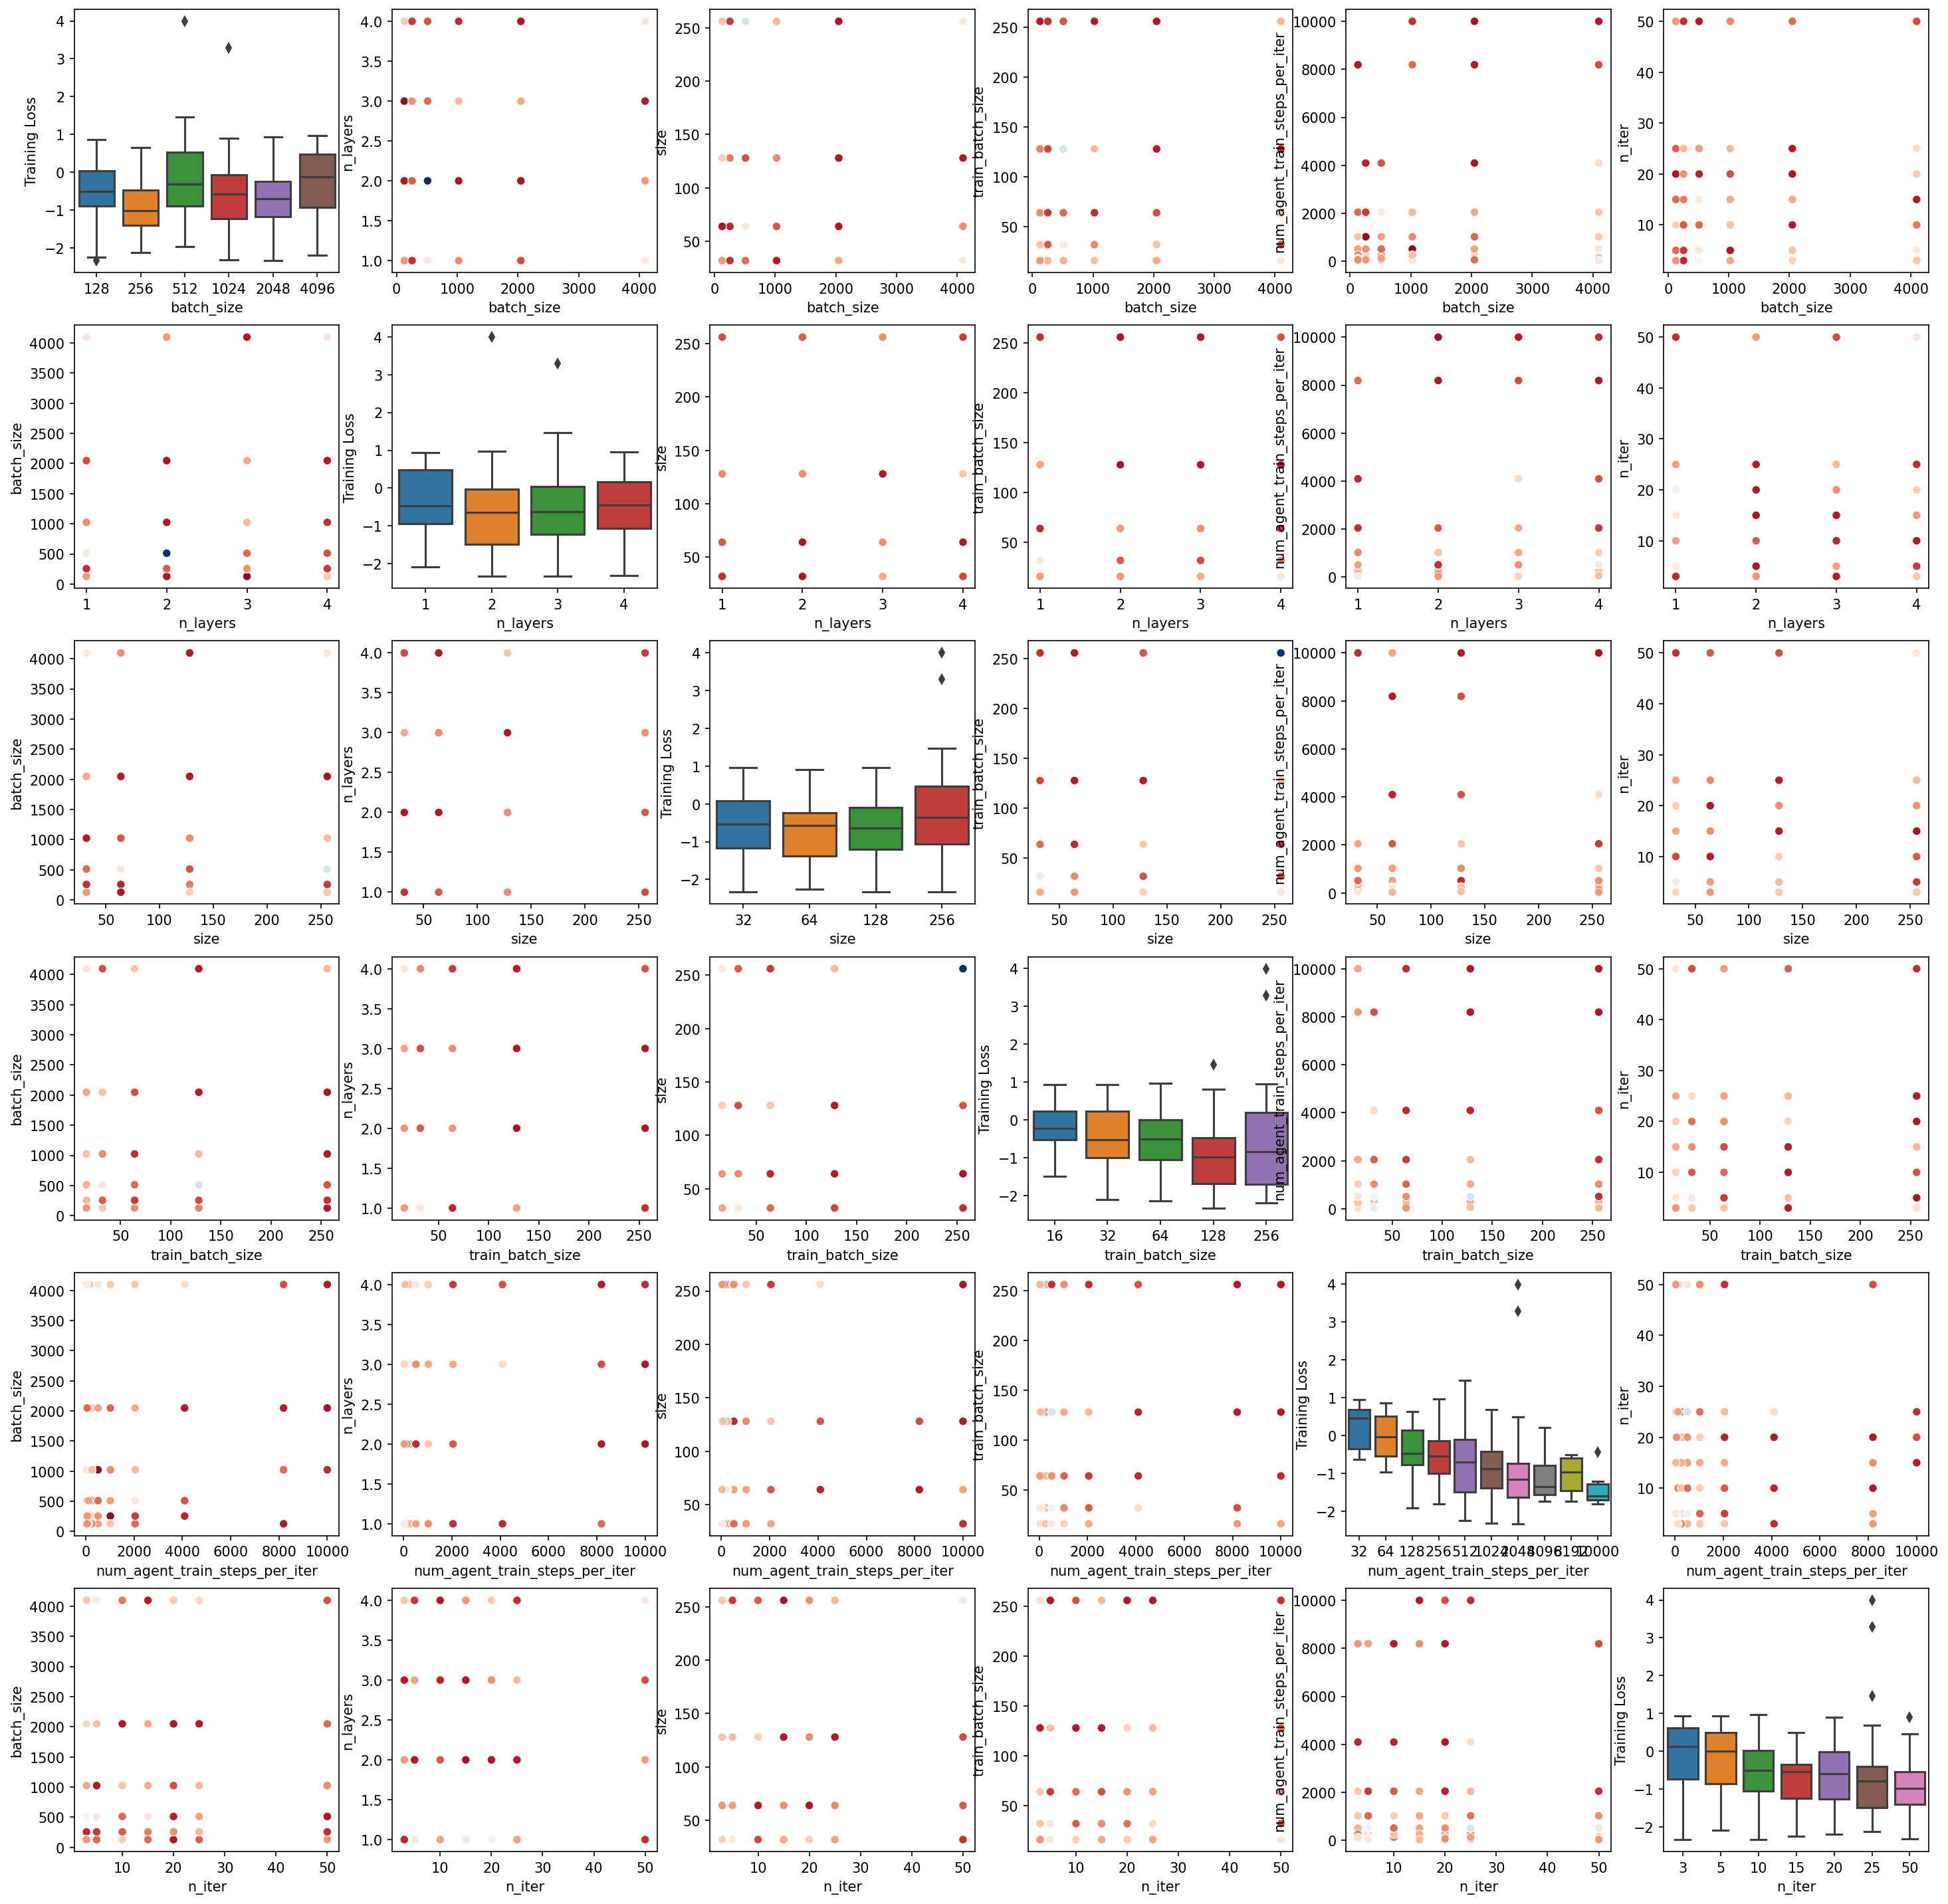

In [20]:
num_features = len(plot_df.columns)
fig,ax = plt.subplots(num_features, num_features, figsize=(24, 24), squeeze=True)
for idx, i in enumerate(plot_df.columns):
    for jdx, j in enumerate(plot_df.columns):
        if i == j:    # diagonal
            # sns.scatterplot(x=plot_df[i], y=plot_df[j], hue, ax=ax[idx][jdx])
            sns.boxplot(x=plot_df[i],y=target_df, 
                        ax=ax[idx][jdx],
                        )
        else:       # off diagonal
            sns.scatterplot(x=plot_df[i],y=plot_df[j], 
                            ax=ax[idx][jdx], hue=target_df, palette=sns.color_palette('RdBu', as_cmap=True),
                            legend=False)


In [21]:
df['Training Loss'].min()

-2.3337693

## Evaluating the best model's performance

### Best config extraction

In [22]:
df[df['Training Loss'] <= df['Training Loss'].min()].to_dict(orient='records')

[{'Eval_AverageReturn': 4768.073,
  'Eval_StdReturn': 76.9204,
  'Eval_MaxReturn': 4886.169,
  'Eval_MinReturn': 4651.285,
  'Eval_AverageEpLen': 1000.0,
  'Train_AverageReturn': 4828.2476,
  'Train_StdReturn': 70.33944,
  'Train_MaxReturn': 4905.129,
  'Train_MinReturn': 4735.1406,
  'Train_AverageEpLen': 1000.0,
  'Train_EnvstepsSoFar': 6000,
  'TimeSinceStart': 45.11954951286316,
  'Training Loss': -2.3337693,
  'Initial_DataCollection_AverageReturn': 4713.6533,
  'id': 'q2_tune_ant_Ant-v4_15-09-2022_20-56-58',
  'expert_policy_file': 'cs285/policies/experts/Ant.pkl',
  'expert_data': 'cs285/expert_data/expert_data_Ant-v4.pkl',
  'env_name': 'Ant-v4',
  'exp_name': 'tune_ant',
  'do_dagger': True,
  'ep_len': 1024,
  'num_agent_train_steps_per_iter': 2048,
  'n_iter': 3,
  'batch_size': 2048,
  'eval_batch_size': 10000,
  'train_batch_size': 128,
  'n_layers': 2,
  'size': 256,
  'learning_rate': 0.0037093683471433117,
  'video_log_freq': -1,
  'scalar_log_freq': 1,
  'no_gpu': Fals

In [23]:
!pwd

/home/mohsen/projects/cs285/hw1


In [31]:
!MUJOCO_GL="egl" python -m cs285.scripts.run_hw1 --expert_policy_file cs285/policies/experts/Ant.pkl --env_name Ant-v4 --exp_name dagger_ant_best --n_iter 25 --expert_data cs285/expert_data/expert_data_Ant-v4.pkl --video_log_freq 5 --size 256 --n_layers 2 --train_batch_size 128 --ep_len 1024 --batch_size 2048 --eval_batch_size 10000 --learning_rate 0.0037093683471433117 --num_agent_train_steps_per_iter 2048 --seed 632 --save_params --do_dagger

########################
logging outputs to  /home/mohsen/projects/cs285/hw1/cs285/scripts/../../data/q2_dagger_ant_best_Ant-v4_16-09-2022_18-54-08
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Iteration : 0
Eval_AverageReturn : 4683.2939453125
Eval_StdReturn : 93.68972778320312
Eval_MaxReturn : 4853.85498046875
Eval_MinReturn : 4503.2294921875
Eval_AverageEpLen : 1000.0
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 53.48069953918457
Training Loss : -2.2143325805664062
Initial_DataCollection_AverageReturn : 4713.6533203125
Expert_AverageReturn : 4770.416015625
Expert_StdReturn : 81.74251556396

In [32]:
df = pd.read_csv('data/q2_dagger_ant_best_Ant-v4_16-09-2022_18-54-08/progress.csv')
df.head()

,Iteration,Eval_AverageReturn,Eval_StdReturn,Eval_MaxReturn,Eval_MinReturn,Eval_AverageEpLen,Train_AverageReturn,Train_StdReturn,Train_MaxReturn,Train_MinReturn,...,Train_EnvstepsSoFar,TimeSinceStart,Training Loss,Initial_DataCollection_AverageReturn,Expert_AverageReturn,Expert_StdReturn,Expert_MaxReturn,Expert_MinReturn,Expert_AverageEpLen,Agent_Accuracy
0,0,4683.2940,93.68973,4853.855,4503.2295,1000.000000,4713.6533,12.196533,4725.8496,4701.4565,...,0,53.480700,-2.214333,4713.6533,4770.4160,81.742516,4970.9340,4655.8100,1000.000000,0.976789
1,1,4761.9230,108.70278,4920.450,4526.1646,1000.000000,4691.0180,65.148100,4765.5137,4606.8213,...,3000,145.565930,-2.326485,4713.6533,4584.2770,571.247300,4884.8660,2794.7917,1000.000000,0.958714
2,2,4359.4600,917.21710,4799.681,1468.5671,938.454545,3571.8633,1732.413300,4851.5137,1122.6860,...,6000,240.949896,-1.933175,4713.6533,4756.1294,95.594640,4922.5312,4549.3633,938.454545,0.914933
3,3,4391.5293,609.01410,4723.549,2482.1814,960.636364,4664.8223,72.979866,4730.7593,4563.0910,...,9000,333.082651,-1.581876,4713.6533,4394.5347,1107.228900,4923.3860,1040.4089,960.636364,0.921563
4,4,4717.8270,79.64118,4900.427,4609.0386,1000.000000,3585.5671,897.733300,4509.4893,2369.5083,...,11523,422.110200,-2.120551,4713.6533,4838.7627,103.756150,4991.5880,4643.2160,1000.000000,0.972458


In [33]:
df['Iteration'] += 1

/tmp/ipykernel_3607119/1795339711.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='value', hue='kind',


<AxesSubplot:xlabel='Iteration', ylabel='Return'>

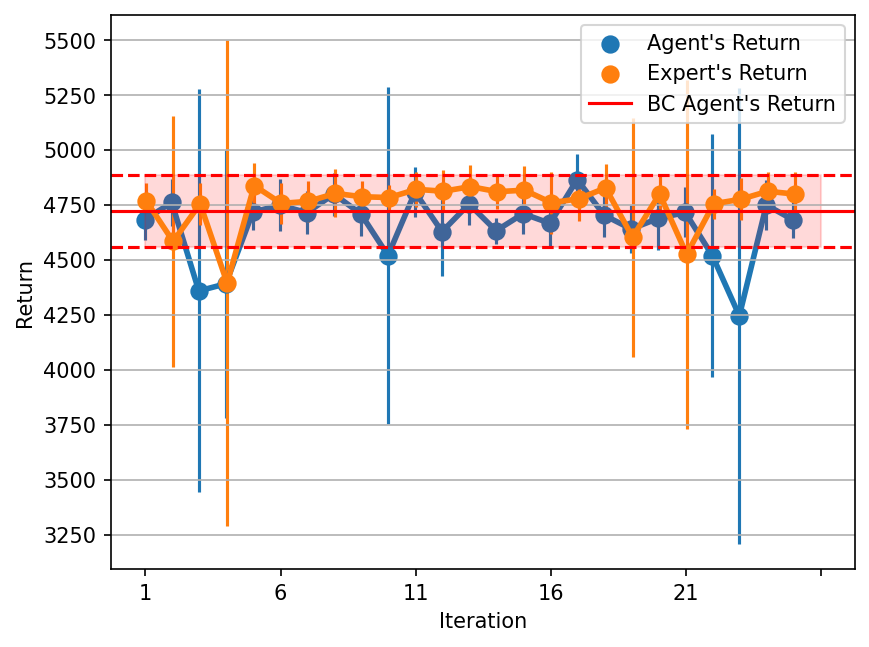

In [42]:
melted_df = pd.melt(df, id_vars=['Iteration'], var_name='kind')

melted_df = melted_df[melted_df['kind'].isin(['Eval_AverageReturn', 'Expert_AverageReturn'])]

melted_df['kind'] = melted_df['kind'].str.replace('Eval_AverageReturn', 'Agent\'s Return')
melted_df['kind'] = melted_df['kind'].str.replace('Expert_AverageReturn', 'Expert\'s Return')

ax = sns.pointplot(x='Iteration', y='value', hue='kind',
    data=melted_df, dodge=True, join=True, ci=None)
# plt.legend()
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in ax.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)


# # Calculate the type of error to plot as the error bars
# # Make sure the order is the same as the points were looped over
errors = df['Eval_StdReturn'].values
ax.errorbar(x_coords[:len(x_coords) // 2], y_coords[:len(x_coords) // 2], yerr=errors, fmt=' ', zorder=-1)

errors = df['Expert_StdReturn'].values
ax.errorbar(x_coords[len(x_coords) // 2:], y_coords[len(x_coords) // 2:], yerr=errors, fmt=' ', zorder=-1)
plt.xticks(np.arange(0, len(df) + 1, len(df) // 5))
plt.yticks(np.arange(3000, 10000, 250))
plt.grid(axis='y')
plt.ylabel('Return')
mean = 4723.0845
std = 163.11101
plt.axhline(y=mean + std, color='r', linestyle='--')
plt.axhline(y=mean - std, color='r', linestyle='--')
plt.axhline(y=mean, color='r', linestyle='-', label='BC Agent\'s Return')
ax.fill_between(x=np.arange(0, len(df) + 1), y1=mean - std, y2=mean + std, alpha=0.15, color='r')
plt.legend()
ax

/tmp/ipykernel_3607119/4087551632.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='Agent_Accuracy',


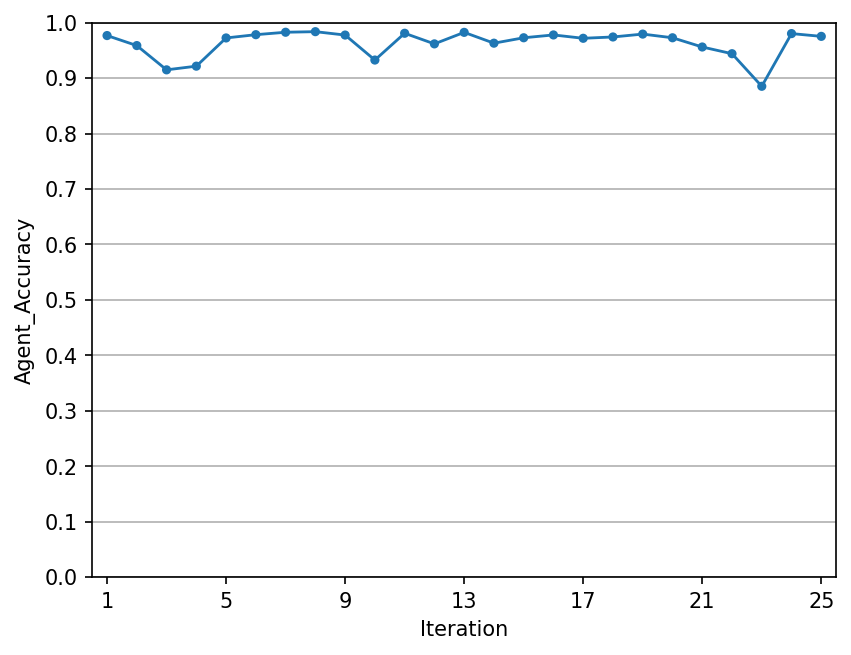

In [39]:
ax = sns.pointplot(x='Iteration', y='Agent_Accuracy', 
    data=df, dodge=True, join=True, ci=None, scale=0.5)

plt.xticks(np.arange(0, len(df) + 1, 4))
plt.yticks(np.arange(0., 1.1, 0.1))
plt.grid(axis='y')
plt.show()

/tmp/ipykernel_3607119/4039488872.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.pointplot(x='Iteration', y='Training Loss',


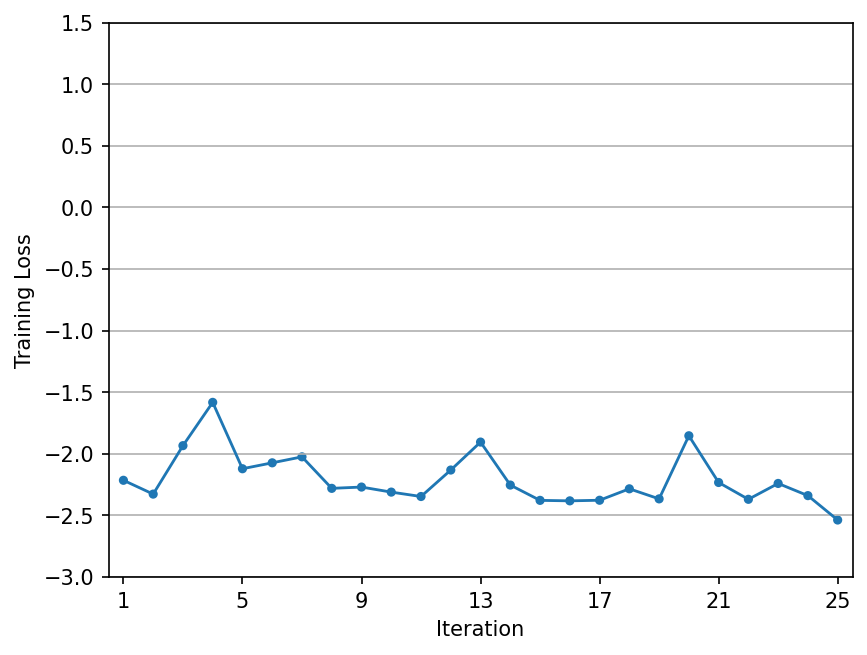

In [45]:
ax = sns.pointplot(x='Iteration', y='Training Loss', 
    data=df, dodge=True, join=True, ci=None, scale=0.5)

plt.xticks(np.arange(0, len(df) + 1, 4))
plt.yticks(np.arange(1.5, -3.5, -0.5))
plt.grid(axis='y')
plt.show()